# Sentiment analysis using pre-trained language models

## Download Hugging face lib

https://huggingface.co/docs/transformers/v4.15.0/installation

In [10]:
!conda install -c huggingface transformers
!pip install torch
!pip install chardet
!pip install transformers

/bin/bash: line 1: conda: command not found


In [11]:
from transformers import pipeline
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
from transformers import pipeline, AutoTokenizer
import matplotlib.pyplot as plt

# Download stopwords if not already downloaded
import nltk

classifier = pipeline("sentiment-analysis")
classifier("I am impressed how long this ink last and how fast the seller sent it to me. Not a hitch at all, fantastic.")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9994031190872192}]

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:


#file_path = '/content/drive/MyDrive/EE4213/individual assignment/csv/kindle review.csv'  # Update with the actual file path
file_path = '/content/drive/MyDrive/EE4213/individual assignment/csv/Kobo Libra 2 review.csv'
#file_path = '/content/drive/MyDrive/EE4213/individual assignment/csv/pocketBook review.csv'
df = pd.read_csv(file_path)

review_data = df['review_detail'].tolist()
review_title = df['review_title'].tolist()
rating = df['rate'].tolist()
reviewer = df['name'].tolist()

#review_data_2d = [review_data[i:i+2] for i in range(0, len(review_data), 2)]
print(review_data[0])
print("Length of review_data:", len(review_data))
#print("Length of review_data 11:", len(review_data[11])) #7003 #set max 1800
#for i in range(len(review_data)):


Sometimes I can't download all the books I buy on platforms other than the Kobo brand
Length of review_data: 100


In [44]:
positive_count = 0
negative_count = 0
#1st number:+ve, 2nd number:-ve
rating_Comment = [["1.0 out of 5 stars",0,0],["2.0 out of 5 stars",0,0],["3.0 out of 5 stars",0,0],["4.0 out of 5 stars",0,0],["5.0 out of 5 stars",0,0]]
#print(rating_Comment[1][0]) #"2.0 out of 5 stars"
all_data = [] #0:id, 1:reviewer, 2:rating, 3:title, 4:comment, 5:label, 6:score
all_data_columns = ['ID', 'Reviewer', 'Rating', 'Title', 'Comment', 'Label', 'Score']
counter = 0

for i in range(len(review_data)):
    # print(i)
    #print(review_data[i])
    if len(review_data[i]) > 1500:
      for j in range(len(review_data[i])//1500+1):
        output = classifier(review_data[i][j*1500:(j+1)*1500])
        # print(output)
        for result in output:
            if result['label'] == 'POSITIVE':
                for k in range(0,5):
                    if rating[i] == rating_Comment[k][0]:
                        #print(rating[i])
                        rating_Comment[k][1] += 1/((len(review_data[i])//1500)+1)

                positive_count += 1/((len(review_data[i])//1500)+1)
            elif result['label'] == 'NEGATIVE':
                for k in range(0,5):
                    if rating[i] == rating_Comment[k][0]:
                        #print(rating[i])
                        rating_Comment[k][2] += 1/((len(review_data[i])//1500)+1)
                negative_count += 1/((len(review_data[i])//1500)+1)
        all_data.append([0] * 7)
        all_data[counter][0] = i+((j+1)/10)
        all_data[counter][1] = reviewer[i]
        all_data[counter][2] = rating[i]
        all_data[counter][3] = review_title[i]
        all_data[counter][4] = review_data[i][j*1500:(j+1)*1500]
        all_data[counter][5] = result['label']
        all_data[counter][6] = result['score']
        counter += 1
    elif len(review_data[i]) <= 1500:
        output = classifier(review_data[i])
        #print(output)
        for result in output:
            if result['label'] == 'POSITIVE':
                for k in range(0,5):
                    if rating[i] == rating_Comment[k][0]:
                        #print(rating[i])
                        rating_Comment[k][1] += 1
                positive_count += 1
            elif result['label'] == 'NEGATIVE':
                for k in range(0,5):
                    if rating[i] == rating_Comment[k][0]:
                        #print(rating[i])
                        rating_Comment[k][2] += 1
                negative_count += 1
        all_data.append([0] * 7)
        all_data[counter][0] = i
        all_data[counter][1] = reviewer[i]
        all_data[counter][2] = rating[i]
        all_data[counter][3] = review_title[i]
        all_data[counter][4] = review_data[i]
        all_data[counter][5] = result['label']
        all_data[counter][6] = result['score']
        counter += 1

#print(all_data)


print("Positive Count:", positive_count)
print("Negative Count:", negative_count)
# print("Rating:", rating_Comment)

Positive Count: 58.5
Negative Count: 41.5


**Show All Of The Results**

In [45]:
pd.set_option('display.max_columns', None)
df = pd.DataFrame(all_data, columns=all_data_columns)
print(df)

       ID                 Reviewer              Rating  \
0     0.0           Sharon Freelon  2.0 out of 5 stars   
1     1.0                 Duckfeet  5.0 out of 5 stars   
2     2.0          Rachel Drenning  5.0 out of 5 stars   
3     3.0               powerglide  4.0 out of 5 stars   
4     4.0  Salvador Congost Luengo  5.0 out of 5 stars   
..    ...                      ...                 ...   
101  95.0             Heidi Bastek  3.0 out of 5 stars   
102  96.0           Cliente Amazon  5.0 out of 5 stars   
103  97.0                  Peter F  5.0 out of 5 stars   
104  98.0                   Birgit  5.0 out of 5 stars   
105  99.0             Amazon Kunde  5.0 out of 5 stars   

                                     Title  \
0                                 Well....   
1    Perfect for backpacking entertainment   
2                        Best eReader ever   
3                                     Good   
4                        Magnificent ebook   
..                         

**Show the graph: "Number of comments in different rating"**

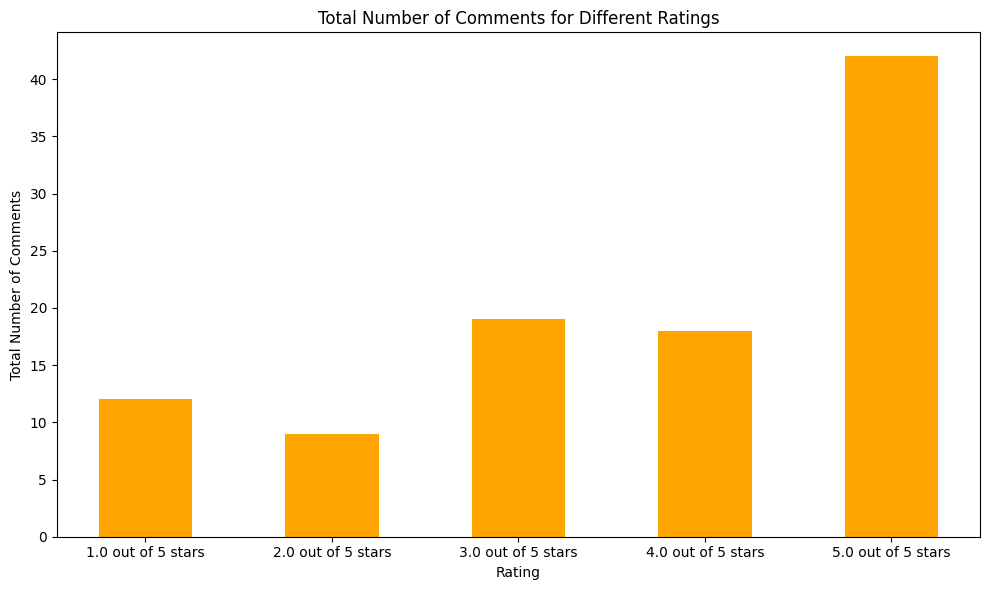

In [46]:
# Rating data
#Rating = [['1.0 out of 5 stars', 2, 19.0], ['2.0 out of 5 stars', 1, 9.0], ['3.0 out of 5 stars', 0, 5], ['4.0 out of 5 stars', 6.5, 3.5], ['5.0 out of 5 stars', 47.06666666666667, 6.933333333333334]]
Rating = rating_Comment

# Extracting data for plotting
x = [item[0] for item in Rating]
y_positive = [item[1] for item in Rating]
y_negative = [item[2] for item in Rating]

# Calculate the total number of comments
total_comments = [positive + negative for positive, negative in zip(y_positive, y_negative)]

# Increase figure size
plt.figure(figsize=(10, 6))

# Set the width of the bars
bar_width = 0.5

# Plotting the bar chart
plt.bar(x, total_comments, color='orange', width=bar_width)

# Adjust x-axis tick positions
#plt.xticks(rotation=45, ha='right')

# Adding labels and title
plt.xlabel('Rating')
plt.ylabel('Total Number of Comments')
plt.title('Total Number of Comments for Different Ratings')

# Displaying the plot
plt.tight_layout()
plt.show()

**Show the graph: "Positive and Negative Counts by Rating"**

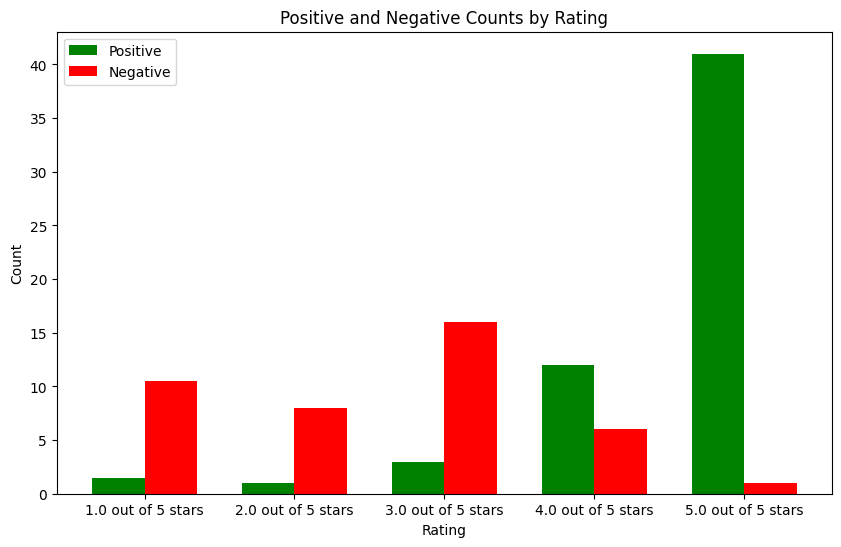

Rating: [['1.0 out of 5 stars', 1.5, 10.5], ['2.0 out of 5 stars', 1, 8], ['3.0 out of 5 stars', 3, 16.0], ['4.0 out of 5 stars', 12, 6], ['5.0 out of 5 stars', 41.0, 1]]


In [47]:

x = [item[0] for item in rating_Comment]
y_positive = [item[1] for item in rating_Comment]
y_negative = [item[2] for item in rating_Comment]

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(x))
r2 = [x + bar_width for x in r1]

# Increase figure size
plt.figure(figsize=(10, 6))

# Plotting the bars
plt.bar(r1, y_positive, color='green', width=bar_width, label='Positive', align='center')
plt.bar(r2, y_negative, color='red', width=bar_width, label='Negative', align='center')

# Adding x-axis labels
plt.xticks([r + bar_width/2 for r in r1], x)

# Adding labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Positive and Negative Counts by Rating')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()
print("Rating:", rating_Comment)

**Show the words with many appearance in both positive and negative comments (Neglect stopwords (eg: I, to, for))**

In [18]:
nltk.download('stopwords')
nltk.download('punkt')

# Get the list of stopwords
stop_words = set(stopwords.words('english'))

# Positive and Negative word counters
positive_words = Counter()
negative_words = Counter()

# Iterate over all_data to count words for each label
for data in all_data:
    comment = data[4]  # Comment is at index 4
    label = data[5]  # Label is at index 5

    # Tokenize the comment into words
    words = word_tokenize(comment)

    # Remove stopwords and filter out common words
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words and word.isalpha()]

    # Update the word counter based on the label
    if label == 'POSITIVE':
        positive_words.update(filtered_words)
    elif label == 'NEGATIVE':
        negative_words.update(filtered_words)

# Get the top 5 most common words for POSITIVE label
top_positive_words = positive_words.most_common(30)

# Get the top 5 most common words for NEGATIVE label
top_negative_words = negative_words.most_common(30)

print("Top 30 words in POSITIVE comments:")
for word, count in top_positive_words:
    print(f"{word}: {count}")

print("Top 30 words in NEGATIVE comments:")
for word, count in top_negative_words:
    print(f"{word}: {count}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Top 30 words in POSITIVE comments:
kindle: 61
read: 33
reading: 33
love: 33
like: 24
one: 24
books: 21
book: 18
screen: 17
great: 16
light: 16
size: 15
battery: 14
life: 14
take: 13
charge: 12
easy: 12
get: 11
paperwhite: 11
time: 10
really: 9
even: 9
got: 9
long: 9
also: 8
bought: 8
day: 8
best: 8
use: 8
every: 7
Top 30 words in NEGATIVE comments:
kindle: 54
read: 20
like: 19
reading: 19
books: 19
get: 18
one: 16
amazon: 16
book: 16
would: 15
want: 14
screen: 14
also: 12
paperwhite: 10
lot: 10
service: 10
buy: 9
without: 9
page: 9
much: 9
another: 9
still: 9
customer: 9
battery: 9
well: 8
love: 8
really: 8
bought: 8
light: 8
time: 8


**LiYuan/amazon-review-sentiment-analysis model**




In [48]:
classifier_Liy = pipeline(model="LiYuan/amazon-review-sentiment-analysis")

In [49]:
# output = classifier_Liy("this is bad")
# print(output)

positive_count = 0
negative_count = 0
#1st number:+ve, 2nd number:-ve
rating_Comment = [["1.0 out of 5 stars",0,0,0,0,0],["2.0 out of 5 stars",0,0,0,0,0],["3.0 out of 5 stars",0,0,0,0,0],["4.0 out of 5 stars",0,0,0,0,0],["5.0 out of 5 stars",0,0,0,0,0]]
#print(rating_Comment[1][0]) #"2.0 out of 5 stars"
all_data = [] #0:id, 1:reviewer, 2:rating, 3:title, 4:comment, 5:label, 6:score
all_data_columns = ['ID', 'Reviewer', 'Rating', 'Title', 'Comment', 'Label', 'Score']
counter = 0

for i in range(len(review_data)):
    # print(i)
    #print(review_data[i])
    if len(review_data[i]) > 1500:
      for j in range(len(review_data[i])//1500+1):
        output = classifier_Liy(review_data[i][j*1500:(j+1)*1500])
        # print(output)
        for result in output:
            if result['label'] == '1 star':
                for k in range(0,5):
                    if rating[i] == rating_Comment[k][0]:
                        #print(rating[i])
                        rating_Comment[k][1] += 1/((len(review_data[i])//1500)+1)
            elif result['label'] == '2 stars':
                for k in range(0,5):
                    if rating[i] == rating_Comment[k][0]:
                        #print(rating[i])
                        rating_Comment[k][2] += 1/((len(review_data[i])//1500)+1)
            elif result['label'] == '3 stars':
                for k in range(0,5):
                    if rating[i] == rating_Comment[k][0]:
                        #print(rating[i])
                        rating_Comment[k][3] += 1/((len(review_data[i])//1500)+1)
            elif result['label'] == '4 stars':
                for k in range(0,5):
                    if rating[i] == rating_Comment[k][0]:
                        #print(rating[i])
                        rating_Comment[k][4] += 1/((len(review_data[i])//1500)+1)
            elif result['label'] == '5 stars':
                for k in range(0,5):
                    if rating[i] == rating_Comment[k][0]:
                        #print(rating[i])
                        rating_Comment[k][5] += 1/((len(review_data[i])//1500)+1)
        all_data.append([0] * 7)
        all_data[counter][0] = i+((j+1)/10)
        all_data[counter][1] = reviewer[i]
        all_data[counter][2] = rating[i]
        all_data[counter][3] = review_title[i]
        all_data[counter][4] = review_data[i][j*1500:(j+1)*1500]
        all_data[counter][5] = result['label']
        all_data[counter][6] = result['score']
        counter += 1
    elif len(review_data[i]) <= 1500:
        output = classifier_Liy(review_data[i])
        #print(output)
        for result in output:
            if result['label'] == '1 star':
                for k in range(0,5):
                    if rating[i] == rating_Comment[k][0]:
                        #print(rating[i])
                        rating_Comment[k][1] += 1
            elif result['label'] == '2 stars':
                for k in range(0,5):
                    if rating[i] == rating_Comment[k][0]:
                        #print(rating[i])
                        rating_Comment[k][2] += 1
            elif result['label'] == '3 stars':
                for k in range(0,5):
                    if rating[i] == rating_Comment[k][0]:
                        #print(rating[i])
                        rating_Comment[k][3] += 1
            elif result['label'] == '4 stars':
                for k in range(0,5):
                    if rating[i] == rating_Comment[k][0]:
                        #print(rating[i])
                        rating_Comment[k][4] += 1
            elif result['label'] == '5 stars':
                for k in range(0,5):
                    if rating[i] == rating_Comment[k][0]:
                        #print(rating[i])
                        rating_Comment[k][5] += 1
        all_data.append([0] * 7)
        all_data[counter][0] = i
        all_data[counter][1] = reviewer[i]
        all_data[counter][2] = rating[i]
        all_data[counter][3] = review_title[i]
        all_data[counter][4] = review_data[i]
        all_data[counter][5] = result['label']
        all_data[counter][6] = result['score']
        counter += 1

#print(all_data)


# print("Positive Count:", positive_count)
# print("Negative Count:", negative_count)
# print("Rating:", rating_Comment)


In [50]:
pd.set_option('display.max_columns', None)
df = pd.DataFrame(all_data, columns=all_data_columns)
print(df)

       ID                 Reviewer              Rating  \
0     0.0           Sharon Freelon  2.0 out of 5 stars   
1     1.0                 Duckfeet  5.0 out of 5 stars   
2     2.0          Rachel Drenning  5.0 out of 5 stars   
3     3.0               powerglide  4.0 out of 5 stars   
4     4.0  Salvador Congost Luengo  5.0 out of 5 stars   
..    ...                      ...                 ...   
101  95.0             Heidi Bastek  3.0 out of 5 stars   
102  96.0           Cliente Amazon  5.0 out of 5 stars   
103  97.0                  Peter F  5.0 out of 5 stars   
104  98.0                   Birgit  5.0 out of 5 stars   
105  99.0             Amazon Kunde  5.0 out of 5 stars   

                                     Title  \
0                                 Well....   
1    Perfect for backpacking entertainment   
2                        Best eReader ever   
3                                     Good   
4                        Magnificent ebook   
..                         

[['1.0 out of 5 stars', 8.5, 2, 1, 0.5, 0], ['2.0 out of 5 stars', 3, 4, 2, 0, 0], ['3.0 out of 5 stars', 5.0, 4, 4.666666666666666, 4.333333333333333, 1], ['4.0 out of 5 stars', 1, 0, 1, 9, 7], ['5.0 out of 5 stars', 0, 0, 0, 4.5, 37.5]]


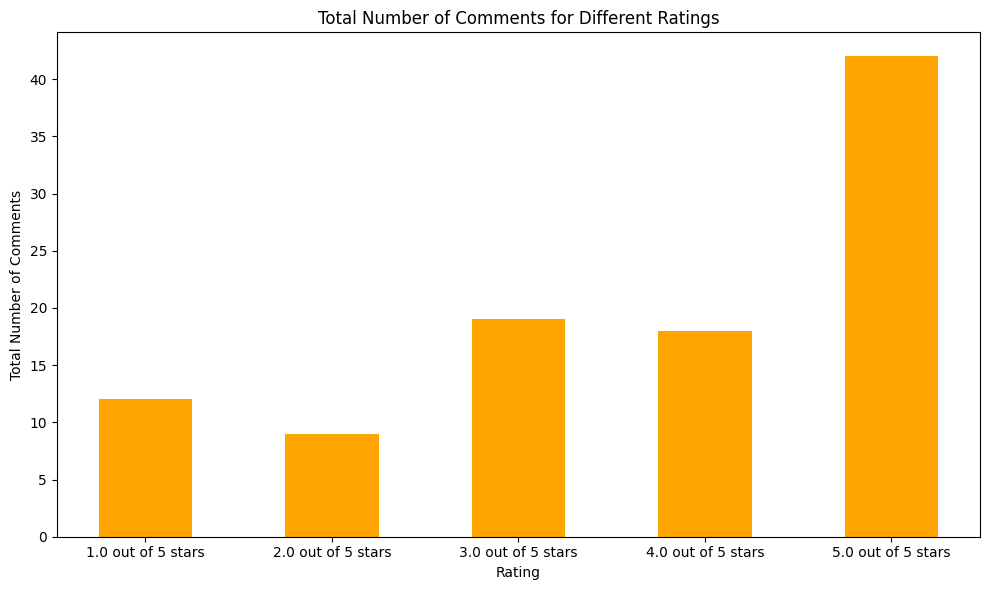

In [51]:
# Rating data
#Rating = [['1.0 out of 5 stars', 2, 19.0], ['2.0 out of 5 stars', 1, 9.0], ['3.0 out of 5 stars', 0, 5], ['4.0 out of 5 stars', 6.5, 3.5], ['5.0 out of 5 stars', 47.06666666666667, 6.933333333333334]]
Rating = rating_Comment

print (Rating)
# Extracting data for plotting
x = [item[0] for item in Rating]
y_1 = [item[1] for item in Rating]
y_2 = [item[2] for item in Rating]
y_3 = [item[3] for item in Rating]
y_4 = [item[4] for item in Rating]
y_5 = [item[5] for item in Rating]

# Calculate the total number of comments
total_comments = [sum(item[1:]) for item in Rating]

# Increase figure size
plt.figure(figsize=(10, 6))

# Set the width of the bars
bar_width = 0.5

# Plotting the bar chart
plt.bar(x, total_comments, color='orange', width=bar_width)

# Adjust x-axis tick positions
#plt.xticks(rotation=45, ha='right')

# Adding labels and title
plt.xlabel('Rating')
plt.ylabel('Total Number of Comments')
plt.title('Total Number of Comments for Different Ratings')

# Displaying the plot
plt.tight_layout()
plt.show()

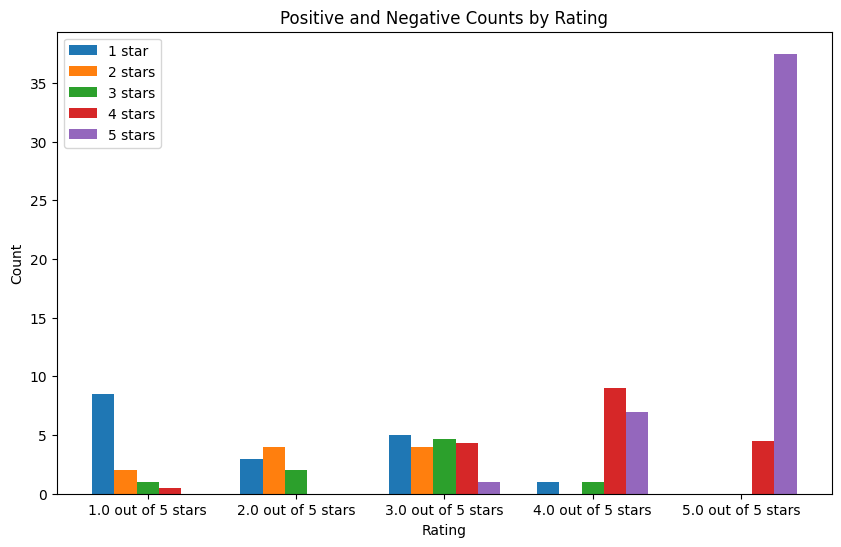

Rating: [['1.0 out of 5 stars', 8.5, 2, 1, 0.5, 0], ['2.0 out of 5 stars', 3, 4, 2, 0, 0], ['3.0 out of 5 stars', 5.0, 4, 4.666666666666666, 4.333333333333333, 1], ['4.0 out of 5 stars', 1, 0, 1, 9, 7], ['5.0 out of 5 stars', 0, 0, 0, 4.5, 37.5]]


In [52]:
# Extracting data for plotting
x = [item[0] for item in Rating]
y_1 = [item[1] for item in Rating]
y_2 = [item[2] for item in Rating]
y_3 = [item[3] for item in Rating]
y_4 = [item[4] for item in Rating]
y_5 = [item[5] for item in Rating]

# Set the width of the bars
bar_width = 0.15

# Set the positions of the bars on the x-axis
r1 = np.arange(len(x))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width*2 for x in r1]
r4 = [x + bar_width*3 for x in r1]
r5 = [x + bar_width*4 for x in r1]

# Increase figure size
plt.figure(figsize=(10, 6))

# Plotting the bars
plt.bar(r1, y_1, width=bar_width, label='1 star', align='center')
plt.bar(r2, y_2, width=bar_width, label='2 stars', align='center')
plt.bar(r3, y_3, width=bar_width, label='3 stars', align='center')
plt.bar(r4, y_4, width=bar_width, label='4 stars', align='center')
plt.bar(r5, y_5, width=bar_width, label='5 stars', align='center')

# Adding x-axis labels
plt.xticks([r + bar_width*2 for r in r1], x)

# Adding labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Positive and Negative Counts by Rating')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

print("Rating:", rating_Comment)

**model="nlptown/bert-base-multilingual-uncased-sentiment**

In [57]:
bert = pipeline(model="nlptown/bert-base-multilingual-uncased-sentiment")

In [ ]:
# output = testing("this is bad")
# print(output)

positive_count = 0
negative_count = 0
#1st number:+ve, 2nd number:-ve
rating_Comment = [["1.0 out of 5 stars",0,0,0,0,0],["2.0 out of 5 stars",0,0,0,0,0],["3.0 out of 5 stars",0,0,0,0,0],["4.0 out of 5 stars",0,0,0,0,0],["5.0 out of 5 stars",0,0,0,0,0]]
#print(rating_Comment[1][0]) #"2.0 out of 5 stars"
all_data = [] #0:id, 1:reviewer, 2:rating, 3:title, 4:comment, 5:label, 6:score
all_data_columns = ['ID', 'Reviewer', 'Rating', 'Title', 'Comment', 'Label', 'Score']
counter = 0

for i in range(len(review_data)):
    # print(i)
    #print(review_data[i])
    if len(review_data[i]) > 1500:
      for j in range(len(review_data[i])//1500+1):
        output = bert(review_data[i][j*1500:(j+1)*1500])
        # print(output)
        for result in output:
            if result['label'] == '1 star':
                for k in range(0,5):
                    if rating[i] == rating_Comment[k][0]:
                        #print(rating[i])
                        rating_Comment[k][1] += 1/((len(review_data[i])//1500)+1)
            elif result['label'] == '2 stars':
                for k in range(0,5):
                    if rating[i] == rating_Comment[k][0]:
                        #print(rating[i])
                        rating_Comment[k][2] += 1/((len(review_data[i])//1500)+1)
            elif result['label'] == '3 stars':
                for k in range(0,5):
                    if rating[i] == rating_Comment[k][0]:
                        #print(rating[i])
                        rating_Comment[k][3] += 1/((len(review_data[i])//1500)+1)
            elif result['label'] == '4 stars':
                for k in range(0,5):
                    if rating[i] == rating_Comment[k][0]:
                        #print(rating[i])
                        rating_Comment[k][4] += 1/((len(review_data[i])//1500)+1)
            elif result['label'] == '5 stars':
                for k in range(0,5):
                    if rating[i] == rating_Comment[k][0]:
                        #print(rating[i])
                        rating_Comment[k][5] += 1/((len(review_data[i])//1500)+1)
        all_data.append([0] * 7)
        all_data[counter][0] = i+((j+1)/10)
        all_data[counter][1] = reviewer[i]
        all_data[counter][2] = rating[i]
        all_data[counter][3] = review_title[i]
        all_data[counter][4] = review_data[i][j*1500:(j+1)*1500]
        all_data[counter][5] = result['label']
        all_data[counter][6] = result['score']
        counter += 1
    elif len(review_data[i]) <= 1500:
        output = bert(review_data[i])
        #print(output)
        for result in output:
            if result['label'] == '1 star':
                for k in range(0,5):
                    if rating[i] == rating_Comment[k][0]:
                        #print(rating[i])
                        rating_Comment[k][1] += 1
            elif result['label'] == '2 stars':
                for k in range(0,5):
                    if rating[i] == rating_Comment[k][0]:
                        #print(rating[i])
                        rating_Comment[k][2] += 1
            elif result['label'] == '3 stars':
                for k in range(0,5):
                    if rating[i] == rating_Comment[k][0]:
                        #print(rating[i])
                        rating_Comment[k][3] += 1
            elif result['label'] == '4 stars':
                for k in range(0,5):
                    if rating[i] == rating_Comment[k][0]:
                        #print(rating[i])
                        rating_Comment[k][4] += 1
            elif result['label'] == '5 stars':
                for k in range(0,5):
                    if rating[i] == rating_Comment[k][0]:
                        #print(rating[i])
                        rating_Comment[k][5] += 1
        all_data.append([0] * 7)
        all_data[counter][0] = i
        all_data[counter][1] = reviewer[i]
        all_data[counter][2] = rating[i]
        all_data[counter][3] = review_title[i]
        all_data[counter][4] = review_data[i]
        all_data[counter][5] = result['label']
        all_data[counter][6] = result['score']
        counter += 1

#print(all_data)


# print("Positive Count:", positive_count)
# print("Negative Count:", negative_count)
# print("Rating:", rating_Comment)


In [ ]:
pd.set_option('display.max_columns', None)
df = pd.DataFrame(all_data, columns=all_data_columns)
print(df)

In [ ]:
# Rating data
#Rating = [['1.0 out of 5 stars', 2, 19.0], ['2.0 out of 5 stars', 1, 9.0], ['3.0 out of 5 stars', 0, 5], ['4.0 out of 5 stars', 6.5, 3.5], ['5.0 out of 5 stars', 47.06666666666667, 6.933333333333334]]
Rating = rating_Comment

print (Rating)
# Extracting data for plotting
x = [item[0] for item in Rating]
y_1 = [item[1] for item in Rating]
y_2 = [item[2] for item in Rating]
y_3 = [item[3] for item in Rating]
y_4 = [item[4] for item in Rating]
y_5 = [item[5] for item in Rating]

# Calculate the total number of comments
total_comments = [sum(item[1:]) for item in Rating]

# Increase figure size
plt.figure(figsize=(10, 6))

# Set the width of the bars
bar_width = 0.5

# Plotting the bar chart
plt.bar(x, total_comments, color='orange', width=bar_width)

# Adjust x-axis tick positions
#plt.xticks(rotation=45, ha='right')

# Adding labels and title
plt.xlabel('Rating')
plt.ylabel('Total Number of Comments')
plt.title('Total Number of Comments for Different Ratings')

# Displaying the plot
plt.tight_layout()
plt.show()

In [ ]:
# Extracting data for plotting
x = [item[0] for item in Rating]
y_1 = [item[1] for item in Rating]
y_2 = [item[2] for item in Rating]
y_3 = [item[3] for item in Rating]
y_4 = [item[4] for item in Rating]
y_5 = [item[5] for item in Rating]

# Set the width of the bars
bar_width = 0.15

# Set the positions of the bars on the x-axis
r1 = np.arange(len(x))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width*2 for x in r1]
r4 = [x + bar_width*3 for x in r1]
r5 = [x + bar_width*4 for x in r1]

# Increase figure size
plt.figure(figsize=(10, 6))

# Plotting the bars
plt.bar(r1, y_1, width=bar_width, label='1 star', align='center')
plt.bar(r2, y_2, width=bar_width, label='2 stars', align='center')
plt.bar(r3, y_3, width=bar_width, label='3 stars', align='center')
plt.bar(r4, y_4, width=bar_width, label='4 stars', align='center')
plt.bar(r5, y_5, width=bar_width, label='5 stars', align='center')

# Adding x-axis labels
plt.xticks([r + bar_width*2 for r in r1], x)

# Adding labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Positive and Negative Counts by Rating')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

print("Rating:", rating_Comment)